# Prepare data for 2, 3, 4 objects

In [ ]:

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.10.0-cp310-cp310-linux_x86_64.whl size=5619620 sha256=eb6dcd729ef48a3c3ebd56b05a7ac2c9e4b2c97e327a69c6956d1a12a36222ea
  Stored in directory: /root/.cache/pip/wheels/21/bc/58/0d0c6056e1339f40188d136cd838c6554d9c17545196dd9110
Successfully built h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.8.0
    Uninstalling h5py-3.8.0:
      Successfully uninstalled h5py-3.8.0
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:

(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

data_train = data_train.reshape(60000, 28, 28)
data_test = data_test.reshape(10000, 28, 28)


4422102/4422102 [==============================] - 2s 0us/step


In [ ]:

data_train_0 = []
data_train_1 = []
data_train_2 = []
data_train_3 = []


for i in range(600):
  if labels_train[i] == 0:
    data_train_0.append(data_train[i,:,:])
  if labels_train[i] == 1:
    data_train_1.append(data_train[i,:,:])
  if labels_train[i] == 5:
    data_train_2.append(data_train[i,:,:])
  if labels_train[i] == 7:
    data_train_3.append(data_train[i,:,:])


data_train_0 = np.asarray(data_train_0)
data_train_1 = np.asarray(data_train_1)
data_train_2 = np.asarray(data_train_2)
data_train_3 = np.asarray(data_train_3)

# Data Size

In [ ]:

data_size = 6000

# 2 Objects

In [ ]:
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

imageio.imwrite('Objects_loc/img.jpg', img)
img = Image.open('Objects_loc/img.jpg')

data_images = np.zeros((data_size,140,140))
data_images_identities = np.zeros(data_size)
data_images_locations = np.zeros(data_size)

labels = np.zeros(data_size)

for i in range(data_size):

  identity0 = rng.choice(3, size=1, replace=False)

  if identity0 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_0 = data_train_0[k0,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_0 = data_train_1[k1,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 2:
    k2 = rng.choice(58, size=1, replace=False)

    data_0 = data_train_2[k2,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)


  identity1 = rng.choice(3, size=1, replace=False)

  if identity1 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_1 = data_train_0[k0,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_1 = data_train_1[k1,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 2:
    k2 = rng.choice(58, size=1, replace=False)


    data_1 = data_train_2[k2,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)


  imageio.imwrite('Objects_loc/data_0.jpg', data_0)
  data_0 = Image.open('Objects_loc/data_0.jpg')
  imageio.imwrite('Objects_loc/data_1.jpg', data_1)
  data_1 = Image.open('Objects_loc/data_1.jpg')


  while(1):
    ii = rng.choice(81, size=1, replace=False)
    if (int(ii/9)) != (ii%9):
      break

  if (int(ii/9)) < (ii%9):
    data_images_locations[i] = ii
  else:
    data_images_locations[i] = (ii%9)*9 + (int(ii/9))


  if (int(ii/9)) < (ii%9):
    data_images_identities[i] = 3 * identity0 + identity1
  else:
    data_images_identities[i] = 3 * identity1 + identity0


  back_im = img.copy()

  location_1 = int(ii/9)
  location_2 = ii%9

  x1 = 28 + (location_1%3)*28
  y1 = 28 + (int(location_1/3))*28

  back_im.paste(data_0,(x1,y1))

  x2 = 28 + (location_2%3)*28
  y2 = 28 + (int(location_2/3))*28

  x2 = x2[0]

  back_im.paste(data_1,(x2,y2))

  data_images[i,:,:] = np.asarray(back_im)











In [ ]:
data_images = data_images.reshape(data_size,140,140)
data_images_identites = data_images_identities
data_images_locations = data_images_locations


def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_images_locations, n_px, n_channels = 1):



    data_shape = (filepaths_list.shape[0], n_px,n_px)
    data_shape2 = (filepaths_list.shape[0],1)
    data_shape3 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_images"
    dataset_name2 = "data_images_identities"
    dataset_name3 = "data_images_locations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_images = filepaths_list[i,:,:]
            data_images_identities0 = filepaths_list2[i]
            data_images_locations0 = data_images_locations

            f[dataset_name1][i, ...] = data_images[None]
            f[dataset_name2][i, ...] = data_images_identities0
            f[dataset_name3][i, ...] = data_images_locations0[i]


write_data_into_h5_file('Multiple_Objects_Identification/data_images_2_Objects', data_images, data_images_identities, data_images_locations, 140, n_channels = 1)






# 3 Objects

In [ ]:
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

imageio.imwrite('Objects_loc/img.jpg', img)
img = Image.open('Objects_loc/img.jpg')

data_images = np.zeros((data_size,140,140))
data_images_identities = np.zeros(data_size)
data_images_locations = np.zeros(data_size)

labels = np.zeros(data_size)

for i in range(data_size):

  identity0 = rng.choice(3, size=1, replace=False)

  if identity0 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_0 = data_train_0[k0,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_0 = data_train_1[k1,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 2:
    k2 = rng.choice(58, size=1, replace=False)

    data_0 = data_train_2[k2,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)


  identity1 = rng.choice(3, size=1, replace=False)

  if identity1 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_1 = data_train_0[k0,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_1 = data_train_1[k1,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 2:
    k2 = rng.choice(58, size=1, replace=False)


    data_1 = data_train_2[k2,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)


  identity2 = rng.choice(3, size=1, replace=False)

  if identity2 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_2 = data_train_0[k0,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_2 = data_train_1[k1,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 2:
    k2 = rng.choice(58, size=1, replace=False)


    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)




  imageio.imwrite('Objects_loc/data_0.jpg', data_0)
  data_0 = Image.open('Objects_loc/data_0.jpg')
  imageio.imwrite('Objects_loc/data_1.jpg', data_1)
  data_1 = Image.open('Objects_loc/data_1.jpg')
  imageio.imwrite('Objects_loc/data_2.jpg', data_2)
  data_2 = Image.open('Objects_loc/data_2.jpg')


  while(1):
    ii = rng.choice(81*9, size=1, replace=False)
    if (int(ii/81)) != (int((ii%81)/9)) and (int((ii%81)/9)) != (ii%9) and (int(ii/81)) != (ii%9):
      break

  if (int(ii/81)) <= (int((ii%81)/9)) and (int((ii%81)/9)) <= (ii%9):                              # A,B,C
    data_images_locations[i] = ii
  elif (int(ii/81)) <= (ii%9) and (ii%9) <= (int((ii%81)/9)):                                 # A,C,B
    data_images_locations[i] = (int(ii/81))*81 + (ii%9)*9 + (int((ii%81)/9))
  elif (ii%9) <= (int((ii%81)/9)) and(int((ii%81)/9)) <= (int(ii/81)):                            # C,B,A
    data_images_locations[i] = (ii%9)*81 + (int((ii%81)/9))*9 + (int(ii/81))
  elif (int((ii%81)/9)) <= (ii%9) and (ii%9) <= (int(ii/81)):                                 # B,C,A
    data_images_locations[i] = (int((ii%81)/9))*81 + (ii%9)*9 + (int(ii/81))
  elif (int((ii%81)/9)) <= (int(ii/81)) and (int(ii/81)) <= (ii%9):                           # B,A,C
    data_images_locations[i] = (int((ii%81)/9))*81 + (int(ii/81))*9 + (ii%9)
  elif (ii%9) <= (int(ii/81)) and (int(ii/81)) <= (int((ii%81)/9)):                           # C,A,B
    data_images_locations[i] = (ii%9)*81 + (int(ii/81))*9 + (int((ii%81)/9))




  if (int(ii/81)) <= (int((ii%81)/9)) and (int((ii%81)/9)) <= (ii%9):                              # A,B,C
    data_images_identities[i] = 9 * identity0 + 3 * identity1 + identity2
  elif (int(ii/81)) <= (ii%9) and (ii%9) <= (int((ii%81)/9)):                                 # A,C,B
    data_images_identities[i] = 9 * identity0 + 3 * identity2 + identity1
  elif (ii%9) <= (int((ii%81)/9)) and(int((ii%81)/9)) <= (int(ii/81)):                            # C,B,A
    data_images_identities[i] = 9 * identity2 + 3 * identity1 + identity0
  elif (int((ii%81)/9)) <= (ii%9) and (ii%9) <= (int(ii/81)):                                 # B,C,A
    data_images_identities[i] = 9 * identity1 + 3 * identity2 + identity0
  elif (int((ii%81)/9)) <= (int(ii/81)) and (int(ii/81)) <= (ii%9):                           # B,A,C
    data_images_identities[i] = 9 * identity1 + 3 * identity0 + identity2
  elif (ii%9) <= (int(ii/81)) and (int(ii/81)) <= (int((ii%81)/9)):                           # C,A,B
    data_images_identities[i] = 9 * identity2 + 3 * identity0 + identity1



  back_im = img.copy()

  location_1 = int(ii/81)
  location_2 = int((ii%81)/9)
  location_3 = ii%9

  x1 = 28 + (location_1%3)*28
  y1 = 28 + (int(location_1/3))*28
  back_im.paste(data_0,(x1,y1))

  x2 = 28 + (location_2%3)*28
  y2 = 28 + (int(location_2/3))*28
  back_im.paste(data_1,(x2,y2))

  x3 = 28 + (location_3%3)*28
  y3 = 28 + (int(location_3/3))*28

  x3 = x3[0]

  back_im.paste(data_2,(x3,y3))

  data_images[i,:,:] = np.asarray(back_im)






In [ ]:
data_images = data_images.reshape(data_size,140,140)
data_images_identites = data_images_identities
data_images_locations = data_images_locations

import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_images_locations, n_px, n_channels = 1):



    data_shape = (filepaths_list.shape[0], n_px,n_px)
    data_shape2 = (filepaths_list.shape[0],1)
    data_shape3 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_images"
    dataset_name2 = "data_images_identities"
    dataset_name3 = "data_images_locations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_images = filepaths_list[i,:,:]
            data_images_identities0 = filepaths_list2[i]
            data_images_locations0 = data_images_locations

            f[dataset_name1][i, ...] = data_images[None]
            f[dataset_name2][i, ...] = data_images_identities0
            f[dataset_name3][i, ...] = data_images_locations0[i]

write_data_into_h5_file('Multiple_Objects_Identification/data_images_3_Objects', data_images, data_images_identities, data_images_locations, 140, n_channels = 1)







# 4 Objects

In [ ]:
img = np.zeros([140,140],dtype=np.uint8)
img.fill(0)

imageio.imwrite('Objects_loc/img.jpg', img)
img = Image.open('Objects_loc/img.jpg')

data_images = np.zeros((data_size,140,140))
data_images_identities = np.zeros(data_size)
data_images_locations = np.zeros(data_size)

labels = np.zeros(data_size)

for i in range(data_size):

  identity0 = rng.choice(3, size=1, replace=False)

  if identity0 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_0 = data_train_0[k0,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_0 = data_train_1[k1,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)
  elif identity0 == 2:
    k2 = rng.choice(58, size=1, replace=False)
    data_0 = data_train_2[k2,:,:].reshape(28,28)
    data_0 = data_0.astype(np.uint8)


  identity1 = rng.choice(3, size=1, replace=False)

  if identity1 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_1 = data_train_0[k0,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_1 = data_train_1[k1,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)
  elif identity1 == 2:
    k2 = rng.choice(58, size=1, replace=False)
    data_1 = data_train_2[k2,:,:].reshape(28,28)
    data_1 = data_1.astype(np.uint8)



  identity2 = rng.choice(3, size=1, replace=False)

  if identity2 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_2 = data_train_0[k0,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_2 = data_train_1[k1,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)
  elif identity2 == 2:
    k2 = rng.choice(58, size=1, replace=False)
    data_2 = data_train_2[k2,:,:].reshape(28,28)
    data_2 = data_2.astype(np.uint8)



  identity3 = rng.choice(3, size=1, replace=False)

  if identity3 == 0:
    k0 = rng.choice(62, size=1, replace=False)
    data_3 = data_train_0[k0,:,:].reshape(28,28)
    data_3 = data_3.astype(np.uint8)
  elif identity3 == 1:
    k1 = rng.choice(66, size=1, replace=False)
    data_3 = data_train_1[k1,:,:].reshape(28,28)
    data_3 = data_3.astype(np.uint8)
  elif identity3 == 2:
    k2 = rng.choice(58, size=1, replace=False)
    data_3 = data_train_2[k2,:,:].reshape(28,28)
    data_3 = data_3.astype(np.uint8)





  imageio.imwrite('Objects_loc/data_0.jpg', data_0)
  data_0 = Image.open('Objects_loc/data_0.jpg')
  imageio.imwrite('Objects_loc/data_1.jpg', data_1)
  data_1 = Image.open('Objects_loc/data_1.jpg')
  imageio.imwrite('Objects_loc/data_2.jpg', data_2)
  data_2 = Image.open('Objects_loc/data_2.jpg')
  imageio.imwrite('Objects_loc/data_3.jpg', data_3)
  data_3 = Image.open('Objects_loc/data_3.jpg')




  while(1):
    ii = rng.choice(81*9*9, size=1, replace=False)
    A = int(ii/(81*9))
    B = int(((ii%(81*9))/(81)))
    C = (int((ii%81)/9))
    D = (ii%9)
    if A != B and B != C and A != C and A != D and B != D and C != D:
      break

  params = [A,B,C,D]
  params.sort()
  data_images_locations[i] = params[0]*81*9 + params[1]*81 + params[2]*9 + params[3]

  identities = []
  for iii in range(4):
    if params[iii] == A:
      identities.append(identity0)
    elif params[iii] == B:
      identities.append(identity1)
    elif params[iii] == C:
      identities.append(identity2)
    elif params[iii] == D:
      identities.append(identity3)

  data_images_identities[i] = 27 * identities[0] + 9 * identities[1] + 3 * identities[2] + identities[3]



  back_im = img.copy()

  location_1 = A
  location_2 = B
  location_3 = C
  location_4 = D

  x1 = 28 + (location_1%3)*28
  y1 = 28 + (int(location_1/3))*28
  back_im.paste(data_0,(x1,y1))

  x2 = 28 + (location_2%3)*28
  y2 = 28 + (int(location_2/3))*28
  back_im.paste(data_1,(x2,y2))

  x3 = 28 + (location_3%3)*28
  y3 = 28 + (int(location_3/3))*28
  back_im.paste(data_2,(x3,y3))

  x4 = 28 + (location_4%3)*28
  y4 = 28 + (int(location_4/3))*28

  x4 = x4[0]

  back_im.paste(data_3,(x4,y4))

  data_images[i,:,:] = np.asarray(back_im)


In [ ]:
data_images = data_images.reshape(data_size,140,140)
data_images_identites = data_images_identities
data_images_locations = data_images_locations


def write_data_into_h5_file(dest_filepath, filepaths_list, filepaths_list2, data_images_locations, n_px, n_channels = 1):



    data_shape = (filepaths_list.shape[0], n_px,n_px)
    data_shape2 = (filepaths_list.shape[0],1)
    data_shape3 = (filepaths_list.shape[0],1)

    dataset_name1 = "data_images"
    dataset_name2 = "data_images_identities"
    dataset_name3 = "data_images_locations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            data_images = filepaths_list[i,:,:]
            data_images_identities0 = filepaths_list2[i]
            data_images_locations0 = data_images_locations

            f[dataset_name1][i, ...] = data_images[None]
            f[dataset_name2][i, ...] = data_images_identities0
            f[dataset_name3][i, ...] = data_images_locations0[i]


write_data_into_h5_file('Multiple_Objects_Identification/data_images_4_Objects', data_images, data_images_identities, data_images_locations, 140, n_channels = 1)


# After Data Preparation

In [8]:

!pip install 'h5py<3.0.0'
import h5py
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape

import matplotlib.pyplot as plt

import imageio

from PIL import Image, ImageDraw, ImageFilter

from numpy.random import default_rng
rng = default_rng()

from tensorflow.python.keras import utils

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

data_size = 6000

print(tf. __version__)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
2.12.0


# Load Data 2 Objects

In [ ]:

def keys(f):
    return [key for key in f.keys()]

f = h5py.File('Multiple_Objects_Identification/data_images_2_Objects', 'r')

print(keys(f))

data_images0 = np.asarray(f['data_images'])
data_images_identities0 = np.asarray(f['data_images_identities'])
data_images_locations0 = np.asarray(f['data_images_locations'])

data_images0 = np.reshape(data_images0,[data_size,140,140,1])

data_train_images = data_images0[0:int((2/3)*data_size),:,:,:]/255

data_train_images_identities = data_images_identities0[0:int((2/3)*data_size)]

data_train_images_locations = data_images_locations0[0:int((2/3)*data_size)]

data_validation_images = data_images0[int((2/3)*data_size):int((5/6)*data_size),:,:,:]/255

data_validation_images_identities = data_images_identities0[int((2/3)*data_size):int((5/6)*data_size)]

data_validation_images_locations = data_images_locations0[int((2/3)*data_size):int((5/6)*data_size)]

data_test_images = data_images0[int((5/6)*data_size):int((1)*data_size),:,:,:]/255

data_test_images_identities = data_images_identities0[int((5/6)*data_size):int((1)*data_size)]

data_test_images_locations = data_images_locations0[int((5/6)*data_size):int((1)*data_size)]



data_train_images_identities = keras.utils.to_categorical(data_train_images_identities, num_classes=9)
data_validation_images_identities = keras.utils.to_categorical(data_validation_images_identities, num_classes=9)
data_test_images_identities = keras.utils.to_categorical(data_test_images_identities, num_classes=9)

data_train_images_locations = keras.utils.to_categorical(data_train_images_locations, num_classes=81)
data_validation_images_locations = keras.utils.to_categorical(data_validation_images_locations, num_classes=81)
data_test_images_locations = keras.utils.to_categorical(data_test_images_locations, num_classes=81)


['data_images', 'data_images_identities', 'data_images_locations']


# Identity Network 2 Objects

Epoch 1/200
16/16 [==============================] - 16s 159ms/step - loss: 2.1488 - accuracy: 0.1423 - val_loss: 1.9421 - val_accuracy: 0.2490
Epoch 2/200
16/16 [==============================] - 1s 38ms/step - loss: 1.6604 - accuracy: 0.3845 - val_loss: 1.0046 - val_accuracy: 0.7510
Epoch 3/200
16/16 [==============================] - 1s 38ms/step - loss: 1.0419 - accuracy: 0.6267 - val_loss: 0.5673 - val_accuracy: 0.8390
Epoch 4/200
16/16 [==============================] - 1s 38ms/step - loss: 0.7079 - accuracy: 0.7615 - val_loss: 0.4158 - val_accuracy: 0.8630
Epoch 5/200
16/16 [==============================] - 1s 38ms/step - loss: 0.5644 - accuracy: 0.8045 - val_loss: 0.3385 - val_accuracy: 0.8710
Epoch 6/200
16/16 [==============================] - 1s 38ms/step - loss: 0.4338 - accuracy: 0.8455 - val_loss: 0.3068 - val_accuracy: 0.8980
Epoch 7/200
16/16 [==============================] - 1s 38ms/step - loss: 0.3554 - accuracy: 0.8795 - val_loss: 0.2209 - val_accuracy: 0.9250
Epoc

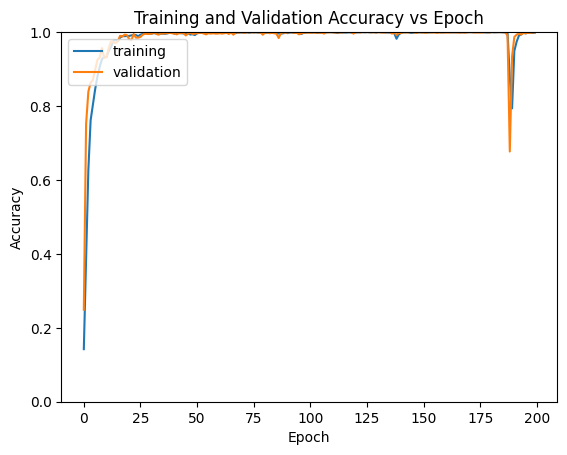

In [ ]:

CNN_network_identity_2_Objects_accuracy = []

for i in range(1):
#Create and train model architecture
  def CNN_network_identity():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(9,activation='softmax'))

      return model


  CNN_network_identity = CNN_network_identity()
  CNN_network_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity.fit(data_train_images,data_train_images_identities,validation_data=(data_validation_images,data_validation_images_identities),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_identity.evaluate(data_test_images,data_test_images_identities)
  CNN_network_identity_2_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_identity_json = CNN_network_identity.to_json()
with open("Multiple_Objects_Identification/CNN_network_identity_2_Objects.json", "w") as json_file:
    json_file.write(CNN_network_identity_json)
# serialize weights to HDF5
CNN_network_identity.save_weights("Multiple_Objects_Identification/CNN_network_identity_2_Objects.h5")
print("Saved model to disk")




#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()




# Location Network 2 Objects

Epoch 1/200
16/16 [==============================] - 3s 55ms/step - loss: 2.8631 - accuracy: 0.2915 - val_loss: 0.2307 - val_accuracy: 0.9930
Epoch 2/200
16/16 [==============================] - 1s 38ms/step - loss: 0.6193 - accuracy: 0.8110 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/200
16/16 [==============================] - 1s 38ms/step - loss: 0.1909 - accuracy: 0.9370 - val_loss: 4.3149e-04 - val_accuracy: 1.0000
Epoch 4/200
16/16 [==============================] - 1s 38ms/step - loss: 0.0940 - accuracy: 0.9705 - val_loss: 6.7359e-05 - val_accuracy: 1.0000
Epoch 5/200
16/16 [==============================] - 1s 38ms/step - loss: 0.0681 - accuracy: 0.9785 - val_loss: 3.7473e-05 - val_accuracy: 1.0000
Epoch 6/200
16/16 [==============================] - 1s 38ms/step - loss: 0.0608 - accuracy: 0.9803 - val_loss: 2.5513e-05 - val_accuracy: 1.0000
Epoch 7/200
16/16 [==============================] - 1s 39ms/step - loss: 0.0458 - accuracy: 0.9868 - val_loss: 1.4198e-06 - val_acc

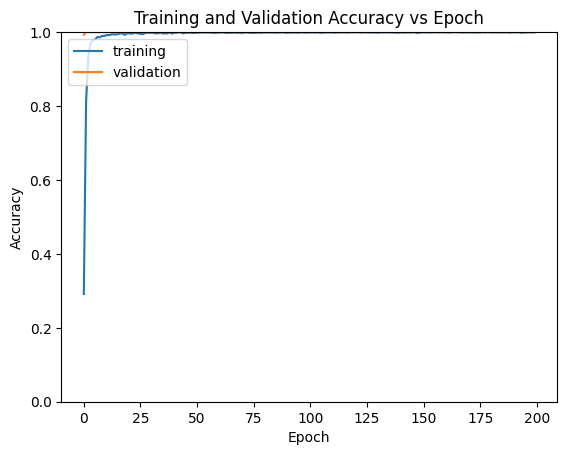

In [ ]:

CNN_network_location_2_Objects_accuracy = []

for i in range(1):

  def CNN_network_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(81,activation='softmax'))

      return model

  CNN_network_location = CNN_network_location()
  CNN_network_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_location.fit(data_train_images,data_train_images_locations,validation_data=(data_validation_images,data_validation_images_locations),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_location.evaluate(data_test_images,data_test_images_locations)
  CNN_network_location_2_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_location_json = CNN_network_location.to_json()
with open("Multiple_Objects_Identification/CNN_network_location_2_Objects.json", "w") as json_file:
    json_file.write(CNN_network_location_json)
# serialize weights to HDF5
CNN_network_location.save_weights("Multiple_Objects_Identification/CNN_network_location_2_Objects.h5")
print("Saved model to disk")





#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()




# Extract Activities from Identitiy Network and Location Network

In [ ]:

# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_identity_2_Objects.json', 'r')
loaded_CNN_network_identity_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_identity_json)
# load weights into new model
CNN_network1.load_weights("Multiple_Objects_Identification/CNN_network_identity_2_Objects.h5")
print("Loaded CNN_network_identity model from disk")


# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_location_2_Objects.json', 'r')
loaded_CNN_network_location_json = json_file.read()
json_file.close()
CNN_network2 = keras.models.model_from_json(loaded_CNN_network_location_json)
# load weights into new model
CNN_network2.load_weights("Multiple_Objects_Identification/CNN_network_location_2_Objects.h5")
print("Loaded CNN_network_location model from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network2_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_test = np.zeros((int((1/6)*data_size),100))

layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_1 = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

layer_outputs = [layer.output for layer in CNN_network2.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_2 = keras.Model(inputs=CNN_network2.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

for i in range(int((2/3)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])



for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])


for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [ ]:

def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (int((1/6)*data_size),100)
    data_shape3 = (int((1/6)*data_size),100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]

        for i in range(int((1/6)*data_size)):

            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]


write_data_into_h5_file('Multiple_Objects_Identification/network_identity_activations_2_Objects', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)
write_data_into_h5_file('Multiple_Objects_Identification/network_location_activations_2_Objects', network2_layer_activations_train, network2_layer_activations_validation, network2_layer_activations_test)



# Combine two pathways and train the common dense layers to determine identites and locations at the same time

In [ ]:
identity_labels = np.argmax(data_train_images_identities,axis=1)
space_labels = np.argmax(data_train_images_locations,axis=1)
identity_and_space_labels_train = space_labels + identity_labels*81
identity_and_space_labels_train = keras.utils.np_utils.to_categorical(identity_and_space_labels_train, num_classes=9*81)

identity_labels = np.argmax(data_validation_images_identities,axis=1)
space_labels = np.argmax(data_validation_images_locations,axis=1)
identity_and_space_labels_validate = space_labels + identity_labels*81
identity_and_space_labels_validate = keras.utils.np_utils.to_categorical(identity_and_space_labels_validate, num_classes=9*81)

identity_labels = np.argmax(data_test_images_identities,axis=1)
space_labels = np.argmax(data_test_images_locations,axis=1)
identity_and_space_labels_test = space_labels + identity_labels*81
identity_and_space_labels_test = keras.utils.np_utils.to_categorical(identity_and_space_labels_test, num_classes=9*81)

Epoch 1/200
16/16 [==============================] - 2s 39ms/step - loss: 6.4541 - accuracy: 0.0082 - val_loss: 6.1056 - val_accuracy: 0.0300
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 5.7150 - accuracy: 0.0245 - val_loss: 5.0955 - val_accuracy: 0.0820
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 4.8520 - accuracy: 0.0683 - val_loss: 3.9480 - val_accuracy: 0.1880
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 4.0034 - accuracy: 0.1287 - val_loss: 2.8498 - val_accuracy: 0.3230
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 3.2705 - accuracy: 0.2035 - val_loss: 2.1055 - val_accuracy: 0.5050
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 2.7569 - accuracy: 0.2693 - val_loss: 1.5770 - val_accuracy: 0.6690
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 2.3564 - accuracy: 0.3365 - val_loss: 1.1863 - val_accuracy: 0.7850
Epoch 8/200


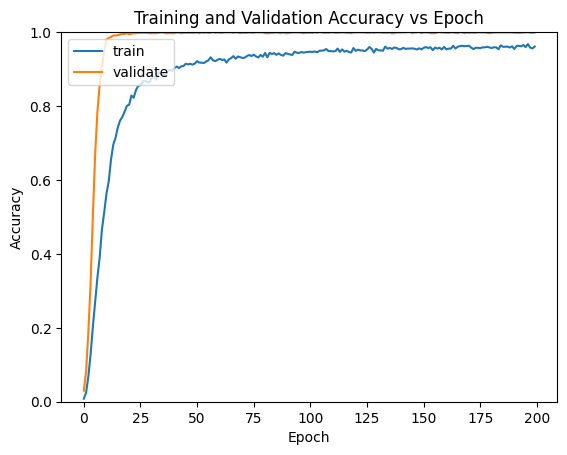

In [ ]:

f = h5py.File('Multiple_Objects_Identification/network_identity_activations_2_Objects', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

f = h5py.File('Multiple_Objects_Identification/network_location_activations_2_Objects', 'r')

network2_layer_activations_test = np.asarray(f['test_layer_activations'])
network2_layer_activations_train = np.asarray(f['train_layer_activations'])
network2_layer_activations_validation = np.asarray(f['validation_layer_activations'])

combined_activation_train = np.concatenate((network1_layer_activations_train, network2_layer_activations_train),axis=1)
combined_activation_test = np.concatenate((network1_layer_activations_test, network2_layer_activations_test),axis=1)
combined_activation_validation = np.concatenate((network1_layer_activations_validation, network2_layer_activations_validation),axis=1)


two_Objects_accuracy = []

for i in range(1):

#Create and train model architecture
  def CNN_network_separate_identity_location():
      model = Sequential()

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((9)*(81),activation='softmax'))

      return model

  CNN_network_separate_identity_location = CNN_network_separate_identity_location()
  CNN_network_separate_identity_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_separate_identity_location.fit(combined_activation_train,identity_and_space_labels_train,validation_data=(combined_activation_validation,identity_and_space_labels_validate),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_separate_identity_location.evaluate(combined_activation_test,identity_and_space_labels_test)
  two_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()



# One pathway network

Epoch 1/200
16/16 [==============================] - 13s 334ms/step - loss: 6.5247 - accuracy: 0.0035 - val_loss: 6.3016 - val_accuracy: 0.0050
Epoch 2/200
16/16 [==============================] - 1s 80ms/step - loss: 6.0960 - accuracy: 0.0050 - val_loss: 5.7336 - val_accuracy: 0.0290
Epoch 3/200
16/16 [==============================] - 1s 80ms/step - loss: 5.6832 - accuracy: 0.0168 - val_loss: 5.2848 - val_accuracy: 0.0470
Epoch 4/200
16/16 [==============================] - 1s 80ms/step - loss: 5.2675 - accuracy: 0.0255 - val_loss: 4.5145 - val_accuracy: 0.0800
Epoch 5/200
16/16 [==============================] - 1s 80ms/step - loss: 4.8065 - accuracy: 0.0397 - val_loss: 4.0103 - val_accuracy: 0.1000
Epoch 6/200
16/16 [==============================] - 1s 80ms/step - loss: 4.3715 - accuracy: 0.0555 - val_loss: 3.4824 - val_accuracy: 0.1330
Epoch 7/200
16/16 [==============================] - 1s 80ms/step - loss: 3.9833 - accuracy: 0.0822 - val_loss: 3.0665 - val_accuracy: 0.1490
Epoc

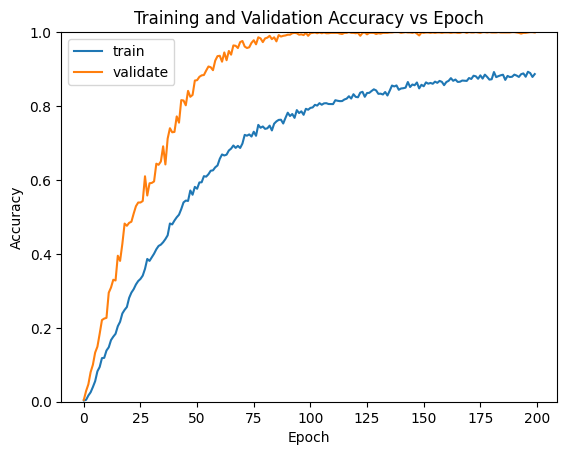

In [ ]:
two_Objects_accuracy_combined = []

for i in range(1):

  def CNN_network_identity_and_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(9*81,activation='softmax'))

      return model

  CNN_network_identity_and_location = CNN_network_identity_and_location()
  CNN_network_identity_and_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity_and_location.fit(data_train_images,identity_and_space_labels_train,validation_data=(data_validation_images,identity_and_space_labels_validate),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_identity_and_location.evaluate(data_test_images,identity_and_space_labels_test)
  two_Objects_accuracy_combined.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()



# Load Data 3 Objects

In [ ]:

def keys(f):
    return [key for key in f.keys()]

f = h5py.File('Multiple_Objects_Identification/data_images_3_Objects', 'r')

print(keys(f))

data_images0 = np.asarray(f['data_images'])
data_images_identities0 = np.asarray(f['data_images_identities'])
data_images_locations0 = np.asarray(f['data_images_locations'])

data_images0 = np.reshape(data_images0,[data_size,140,140,1])

data_train_images = data_images0[0:int((2/3)*data_size),:,:,:]/255

data_train_images_identities = data_images_identities0[0:int((2/3)*data_size)]

data_train_images_locations = data_images_locations0[0:int((2/3)*data_size)]

data_validation_images = data_images0[int((2/3)*data_size):int((5/6)*data_size),:,:,:]/255

data_validation_images_identities = data_images_identities0[int((2/3)*data_size):int((5/6)*data_size)]

data_validation_images_locations = data_images_locations0[int((2/3)*data_size):int((5/6)*data_size)]

data_test_images = data_images0[int((5/6)*data_size):int((1)*data_size),:,:,:]/255

data_test_images_identities = data_images_identities0[int((5/6)*data_size):int((1)*data_size)]

data_test_images_locations = data_images_locations0[int((5/6)*data_size):int((1)*data_size)]



data_train_images_identities = keras.utils.to_categorical(data_train_images_identities, num_classes=9*3)
data_validation_images_identities = keras.utils.to_categorical(data_validation_images_identities, num_classes=9*3)
data_test_images_identities = keras.utils.to_categorical(data_test_images_identities, num_classes=9*3)

data_train_images_locations = keras.utils.to_categorical(data_train_images_locations, num_classes=81*9)
data_validation_images_locations = keras.utils.to_categorical(data_validation_images_locations, num_classes=81*9)
data_test_images_locations = keras.utils.to_categorical(data_test_images_locations, num_classes=81*9)


['data_images', 'data_images_identities', 'data_images_locations']


# Identity Network 3 Objects

Epoch 1/200
16/16 [==============================] - 3s 57ms/step - loss: 3.2946 - accuracy: 0.0390 - val_loss: 3.2838 - val_accuracy: 0.0470
Epoch 2/200
16/16 [==============================] - 1s 38ms/step - loss: 3.2480 - accuracy: 0.0553 - val_loss: 3.1031 - val_accuracy: 0.0850
Epoch 3/200
16/16 [==============================] - 1s 38ms/step - loss: 2.9704 - accuracy: 0.1093 - val_loss: 2.4741 - val_accuracy: 0.2450
Epoch 4/200
16/16 [==============================] - 1s 38ms/step - loss: 2.4497 - accuracy: 0.2265 - val_loss: 1.8579 - val_accuracy: 0.4620
Epoch 5/200
16/16 [==============================] - 1s 37ms/step - loss: 2.0286 - accuracy: 0.3320 - val_loss: 1.4809 - val_accuracy: 0.5680
Epoch 6/200
16/16 [==============================] - 1s 38ms/step - loss: 1.6698 - accuracy: 0.4378 - val_loss: 1.1491 - val_accuracy: 0.6750
Epoch 7/200
16/16 [==============================] - 1s 38ms/step - loss: 1.4252 - accuracy: 0.5142 - val_loss: 1.0308 - val_accuracy: 0.7090
Epoch 

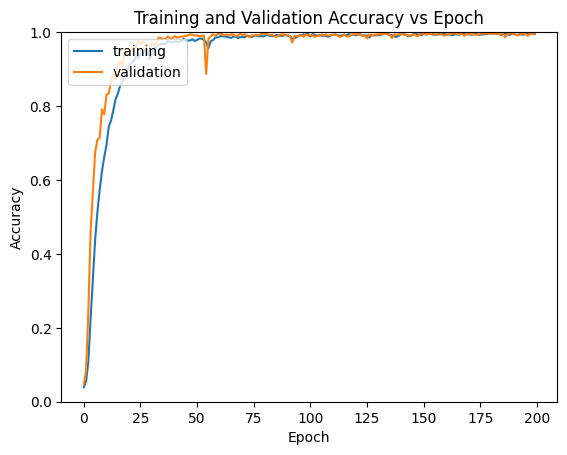

In [ ]:

CNN_network_identity_3_Objects_accuracy = []

for i in range(1):
  def CNN_network_identity():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(9*3,activation='softmax'))

      return model

  CNN_network_identity = CNN_network_identity()
  CNN_network_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity.fit(data_train_images,data_train_images_identities,validation_data=(data_validation_images,data_validation_images_identities),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_identity.evaluate(data_test_images,data_test_images_identities)
  CNN_network_identity_3_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_identity_json = CNN_network_identity.to_json()
with open("Multiple_Objects_Identification/CNN_network_identity_3_Objects.json", "w") as json_file:
    json_file.write(CNN_network_identity_json)
# serialize weights to HDF5
CNN_network_identity.save_weights("Multiple_Objects_Identification/CNN_network_identity_3_Objects.h5")
print("Saved model to disk")






#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


# Location Network 3 Objects

Epoch 1/200
16/16 [==============================] - 3s 58ms/step - loss: 5.6013 - accuracy: 0.0428 - val_loss: 3.0991 - val_accuracy: 0.3530
Epoch 2/200
16/16 [==============================] - 1s 39ms/step - loss: 2.9031 - accuracy: 0.2822 - val_loss: 0.6776 - val_accuracy: 0.9180
Epoch 3/200
16/16 [==============================] - 1s 38ms/step - loss: 1.2998 - accuracy: 0.6185 - val_loss: 0.1170 - val_accuracy: 0.9970
Epoch 4/200
16/16 [==============================] - 1s 38ms/step - loss: 0.6414 - accuracy: 0.8020 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 5/200
16/16 [==============================] - 1s 38ms/step - loss: 0.3625 - accuracy: 0.8830 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/200
16/16 [==============================] - 1s 39ms/step - loss: 0.2698 - accuracy: 0.9118 - val_loss: 5.6959e-04 - val_accuracy: 1.0000
Epoch 7/200
16/16 [==============================] - 1s 39ms/step - loss: 0.1915 - accuracy: 0.9337 - val_loss: 2.7245e-04 - val_accuracy: 1.000

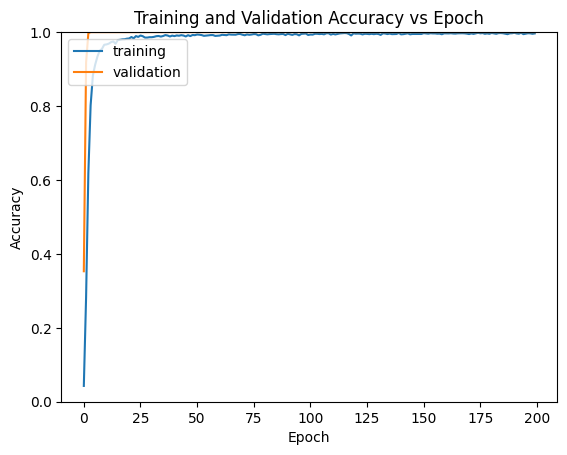

In [ ]:

CNN_network_location_3_Objects_accuracy = []

for i in range(1):

  def CNN_network_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(81*9,activation='softmax'))

      return model

  CNN_network_location = CNN_network_location()
  CNN_network_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_location.fit(data_train_images,data_train_images_locations,validation_data=(data_validation_images,data_validation_images_locations),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_location.evaluate(data_test_images,data_test_images_locations)
  CNN_network_location_3_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_location_json = CNN_network_location.to_json()
with open("Multiple_Objects_Identification/CNN_network_location_3_Objects.json", "w") as json_file:
    json_file.write(CNN_network_location_json)
# serialize weights to HDF5
CNN_network_location.save_weights("Multiple_Objects_Identification/CNN_network_location_3_Objects.h5")
print("Saved model to disk")






#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()



# Extract Activities from Identitiy Network and Location Network

In [ ]:

# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_identity_3_Objects.json', 'r')
loaded_CNN_network_identity_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_identity_json)
# load weights into new model
CNN_network1.load_weights("Multiple_Objects_Identification/CNN_network_identity_3_Objects.h5")
print("Loaded CNN_network_identity model from disk")


# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_location_3_Objects.json', 'r')
loaded_CNN_network_location_json = json_file.read()
json_file.close()
CNN_network2 = keras.models.model_from_json(loaded_CNN_network_location_json)
# load weights into new model
CNN_network2.load_weights("Multiple_Objects_Identification/CNN_network_location_3_Objects.h5")
print("Loaded CNN_network_location model from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network2_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_test = np.zeros((int((1/6)*data_size),100))


layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_1 = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

layer_outputs = [layer.output for layer in CNN_network2.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_2 = keras.Model(inputs=CNN_network2.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

for i in range(int((2/3)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])



for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])


for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


In [ ]:
import h5py
def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (int((1/6)*data_size),100)
    data_shape3 = (int((1/6)*data_size),100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]
        for i in range(int((1/6)*data_size)):
            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]


write_data_into_h5_file('Multiple_Objects_Identification/network_identity_activations_3_Objects', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)
write_data_into_h5_file('Multiple_Objects_Identification/network_location_activations_3_Objects', network2_layer_activations_train, network2_layer_activations_validation, network2_layer_activations_test)



# Combine two pathways and train the common dense layers to determine identites and locations at the same time

In [ ]:
identity_labels = np.argmax(data_train_images_identities,axis=1)
space_labels = np.argmax(data_train_images_locations,axis=1)
identity_and_space_labels_train = space_labels + identity_labels*(81*9)
identity_and_space_labels_train = keras.utils.np_utils.to_categorical(identity_and_space_labels_train, num_classes=(9*3)*(81*9))

identity_labels = np.argmax(data_validation_images_identities,axis=1)
space_labels = np.argmax(data_validation_images_locations,axis=1)
identity_and_space_labels_validate = space_labels + identity_labels*(81*9)
identity_and_space_labels_validate = keras.utils.np_utils.to_categorical(identity_and_space_labels_validate, num_classes=(9*3)*(81*9))

identity_labels = np.argmax(data_test_images_identities,axis=1)
space_labels = np.argmax(data_test_images_locations,axis=1)
identity_and_space_labels_test = space_labels + identity_labels*(81*9)
identity_and_space_labels_test = keras.utils.np_utils.to_categorical(identity_and_space_labels_test, num_classes=(9*3)*(81*9))

Epoch 1/200
16/16 [==============================] - 2s 36ms/step - loss: 9.6683 - accuracy: 0.0012 - val_loss: 8.8217 - val_accuracy: 0.0020
Epoch 2/200
16/16 [==============================] - 0s 20ms/step - loss: 7.9675 - accuracy: 0.0030 - val_loss: 8.4045 - val_accuracy: 0.0150
Epoch 3/200
16/16 [==============================] - 0s 20ms/step - loss: 7.3327 - accuracy: 0.0105 - val_loss: 8.0722 - val_accuracy: 0.0270
Epoch 4/200
16/16 [==============================] - 0s 20ms/step - loss: 6.7101 - accuracy: 0.0243 - val_loss: 7.7520 - val_accuracy: 0.0580
Epoch 5/200
16/16 [==============================] - 0s 20ms/step - loss: 5.9467 - accuracy: 0.0443 - val_loss: 7.2300 - val_accuracy: 0.0980
Epoch 6/200
16/16 [==============================] - 0s 20ms/step - loss: 5.2239 - accuracy: 0.0683 - val_loss: 6.8112 - val_accuracy: 0.1280
Epoch 7/200
16/16 [==============================] - 0s 20ms/step - loss: 4.6838 - accuracy: 0.0880 - val_loss: 6.4164 - val_accuracy: 0.1550
Epoch 

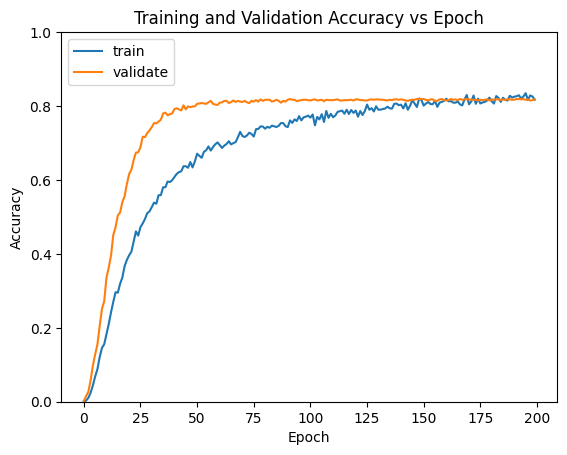

In [ ]:

f = h5py.File('Multiple_Objects_Identification/network_identity_activations_3_Objects', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

f = h5py.File('Multiple_Objects_Identification/network_location_activations_3_Objects', 'r')

network2_layer_activations_test = np.asarray(f['test_layer_activations'])
network2_layer_activations_train = np.asarray(f['train_layer_activations'])
network2_layer_activations_validation = np.asarray(f['validation_layer_activations'])

combined_activation_train = np.concatenate((network1_layer_activations_train, network2_layer_activations_train),axis=1)
combined_activation_test = np.concatenate((network1_layer_activations_test, network2_layer_activations_test),axis=1)
combined_activation_validation = np.concatenate((network1_layer_activations_validation, network2_layer_activations_validation),axis=1)

three_Objects_accuracy = []

for i in range(1):

#Create and train model architecture
  def CNN_network_separate_identity_location():
      model = Sequential()

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((9*3)*(81*9),activation='softmax'))

      return model

  CNN_network_separate_identity_location = CNN_network_separate_identity_location()
  CNN_network_separate_identity_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_separate_identity_location.fit(combined_activation_train,identity_and_space_labels_train,validation_data=(combined_activation_validation,identity_and_space_labels_validate),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_separate_identity_location.evaluate(combined_activation_test,identity_and_space_labels_test)
  three_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()




# One pathway network

Epoch 1/1500
16/16 [==============================] - 5s 116ms/step - loss: 9.6809 - accuracy: 0.0000e+00 - val_loss: 9.0479 - val_accuracy: 0.0000e+00
Epoch 2/1500
16/16 [==============================] - 1s 91ms/step - loss: 8.2357 - accuracy: 0.0012 - val_loss: 8.6911 - val_accuracy: 0.0010
Epoch 3/1500
16/16 [==============================] - 1s 90ms/step - loss: 7.7928 - accuracy: 7.5000e-04 - val_loss: 8.6204 - val_accuracy: 0.0000e+00
Epoch 4/1500
16/16 [==============================] - 1s 88ms/step - loss: 7.6487 - accuracy: 5.0000e-04 - val_loss: 8.6827 - val_accuracy: 0.0000e+00
Epoch 5/1500
16/16 [==============================] - 1s 89ms/step - loss: 7.5959 - accuracy: 7.5000e-04 - val_loss: 8.5549 - val_accuracy: 0.0020
Epoch 6/1500
16/16 [==============================] - 1s 90ms/step - loss: 7.5414 - accuracy: 7.5000e-04 - val_loss: 8.4725 - val_accuracy: 0.0010
Epoch 7/1500
16/16 [==============================] - 1s 90ms/step - loss: 7.4395 - accuracy: 0.0025 - val_lo

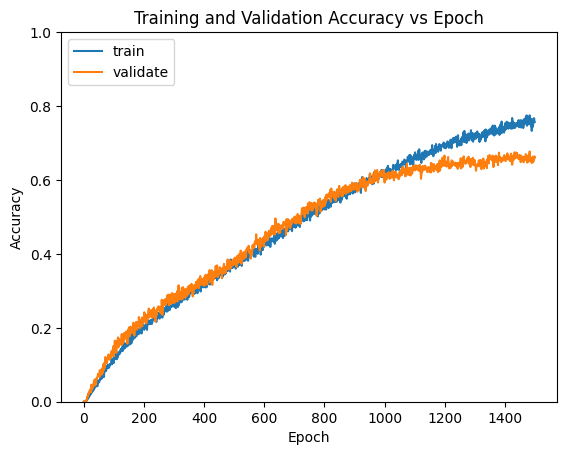

In [ ]:
three_Objects_accuracy_combined = []

for i in range(1):

  def CNN_network_identity_and_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((9*3)*(81*9),activation='softmax'))

      return model

  CNN_network_identity_and_location = CNN_network_identity_and_location()
  CNN_network_identity_and_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity_and_location.fit(data_train_images,identity_and_space_labels_train,validation_data=(data_validation_images,identity_and_space_labels_validate),epochs=1500,batch_size=256,shuffle=True)

  scores = CNN_network_identity_and_location.evaluate(data_test_images,identity_and_space_labels_test)
  three_Objects_accuracy_combined.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

# serialize model to JSON
CNN_network_identity_and_location_json = CNN_network_identity_and_location.to_json()
with open("Multiple_Objects_Identification/CNN_network_identity_and_location.json", "w") as json_file:
    json_file.write(CNN_network_identity_and_location_json)
# serialize weights to HDF5
CNN_network_identity_and_location.save_weights("Multiple_Objects_Identification/CNN_network_identity_and_location.h5")
print("Saved model to disk")

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()


# Load Data 4 Objects

In [2]:

def keys(f):
    return [key for key in f.keys()]

f = h5py.File('Multiple_Objects_Identification/data_images_4_Objects', 'r')

print(keys(f))

data_images0 = np.asarray(f['data_images'])
data_images_identities0 = np.asarray(f['data_images_identities'])
data_images_locations0 = np.asarray(f['data_images_locations'])

data_images0 = np.reshape(data_images0,[data_size,140,140,1])

data_train_images = data_images0[0:int((2/3)*data_size),:,:,:]/255

data_train_images_identities = data_images_identities0[0:int((2/3)*data_size)]

data_train_images_locations = data_images_locations0[0:int((2/3)*data_size)]

data_validation_images = data_images0[int((2/3)*data_size):int((5/6)*data_size),:,:,:]/255

data_validation_images_identities = data_images_identities0[int((2/3)*data_size):int((5/6)*data_size)]

data_validation_images_locations = data_images_locations0[int((2/3)*data_size):int((5/6)*data_size)]

data_test_images = data_images0[int((5/6)*data_size):int((1)*data_size),:,:,:]/255

data_test_images_identities = data_images_identities0[int((5/6)*data_size):int((1)*data_size)]

data_test_images_locations = data_images_locations0[int((5/6)*data_size):int((1)*data_size)]



data_train_images_identities = keras.utils.to_categorical(data_train_images_identities, num_classes=9*3*3)
data_validation_images_identities = keras.utils.to_categorical(data_validation_images_identities, num_classes=9*3*3)
data_test_images_identities = keras.utils.to_categorical(data_test_images_identities, num_classes=9*3*3)

data_train_images_locations = keras.utils.to_categorical(data_train_images_locations, num_classes=81*9*9)
data_validation_images_locations = keras.utils.to_categorical(data_validation_images_locations, num_classes=81*9*9)
data_test_images_locations = keras.utils.to_categorical(data_test_images_locations, num_classes=81*9*9)


['data_images', 'data_images_identities', 'data_images_locations']


# Identity Network 4 Objects

Epoch 1/200
16/16 [==============================] - 24s 469ms/step - loss: 4.3968 - accuracy: 0.0170 - val_loss: 4.3938 - val_accuracy: 0.0160
Epoch 2/200
16/16 [==============================] - 3s 172ms/step - loss: 4.3902 - accuracy: 0.0148 - val_loss: 4.3886 - val_accuracy: 0.0180
Epoch 3/200
16/16 [==============================] - 3s 173ms/step - loss: 4.3750 - accuracy: 0.0188 - val_loss: 4.3586 - val_accuracy: 0.0250
Epoch 4/200
16/16 [==============================] - 3s 173ms/step - loss: 4.3040 - accuracy: 0.0272 - val_loss: 4.1748 - val_accuracy: 0.0520
Epoch 5/200
16/16 [==============================] - 3s 174ms/step - loss: 4.0062 - accuracy: 0.0527 - val_loss: 3.6294 - val_accuracy: 0.0990
Epoch 6/200
16/16 [==============================] - 3s 175ms/step - loss: 3.6227 - accuracy: 0.0830 - val_loss: 3.1346 - val_accuracy: 0.1760
Epoch 7/200
16/16 [==============================] - 3s 174ms/step - loss: 3.3022 - accuracy: 0.1205 - val_loss: 2.8874 - val_accuracy: 0.239

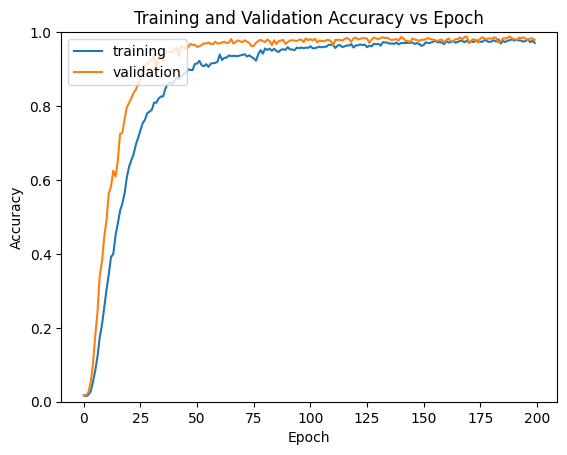

In [3]:

CNN_network_identity_4_Objects_accuracy = []

for i in range(1):
#Create and train model architecture
  def CNN_network_identity():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(9*3*3,activation='softmax'))

      return model


  CNN_network_identity = CNN_network_identity()
  CNN_network_identity.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity.fit(data_train_images,data_train_images_identities,validation_data=(data_validation_images,data_validation_images_identities),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_identity.evaluate(data_test_images,data_test_images_identities)
  CNN_network_identity_4_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_identity_json = CNN_network_identity.to_json()
with open("Multiple_Objects_Identification/CNN_network_identity_4_Objects.json", "w") as json_file:
    json_file.write(CNN_network_identity_json)
# serialize weights to HDF5
CNN_network_identity.save_weights("Multiple_Objects_Identification/CNN_network_identity_4_Objects.h5")
print("Saved model to disk")






#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


# Location Network 4 Objects

Epoch 1/200
16/16 [==============================] - 6s 215ms/step - loss: 6.7656 - accuracy: 0.0095 - val_loss: 4.7032 - val_accuracy: 0.0560
Epoch 2/200
16/16 [==============================] - 3s 189ms/step - loss: 4.3429 - accuracy: 0.0635 - val_loss: 2.7846 - val_accuracy: 0.3230
Epoch 3/200
16/16 [==============================] - 3s 190ms/step - loss: 2.7558 - accuracy: 0.2503 - val_loss: 1.0152 - val_accuracy: 0.8470
Epoch 4/200
16/16 [==============================] - 3s 192ms/step - loss: 1.5113 - accuracy: 0.5408 - val_loss: 0.2298 - val_accuracy: 0.9770
Epoch 5/200
16/16 [==============================] - 3s 193ms/step - loss: 0.8044 - accuracy: 0.7458 - val_loss: 0.0398 - val_accuracy: 0.9970
Epoch 6/200
16/16 [==============================] - 3s 193ms/step - loss: 0.4501 - accuracy: 0.8560 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/200
16/16 [==============================] - 3s 194ms/step - loss: 0.3098 - accuracy: 0.8992 - val_loss: 0.0022 - val_accuracy: 1.0000

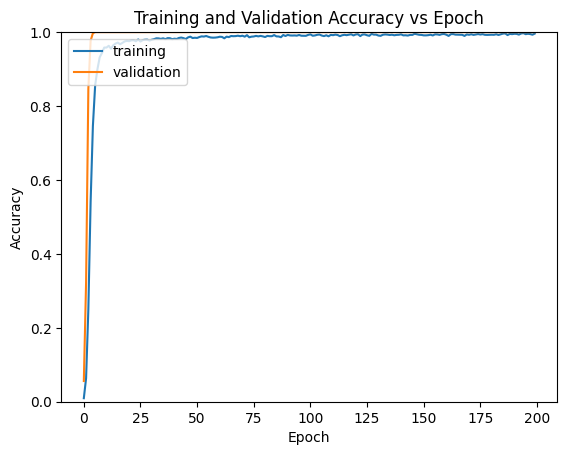

In [4]:

CNN_network_location_4_Objects_accuracy = []

for i in range(1):

  def CNN_network_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(256,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(128,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(81*9*9,activation='softmax'))

      return model

  CNN_network_location = CNN_network_location()
  CNN_network_location.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_location.fit(data_train_images,data_train_images_locations,validation_data=(data_validation_images,data_validation_images_locations),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_location.evaluate(data_test_images,data_test_images_locations)
  CNN_network_location_4_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))


# serialize model to JSON
CNN_network_location_json = CNN_network_location.to_json()
with open("Multiple_Objects_Identification/CNN_network_location_4_Objects.json", "w") as json_file:
    json_file.write(CNN_network_location_json)
# serialize weights to HDF5
CNN_network_location.save_weights("Multiple_Objects_Identification/CNN_network_location_4_Objects.h5")
print("Saved model to disk")




#Plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='upper left')
plt.show()


# Extract Activities from Identitiy Network and Location Network

In [5]:

# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_identity_4_Objects.json', 'r')
loaded_CNN_network_identity_json = json_file.read()
json_file.close()
CNN_network1 = keras.models.model_from_json(loaded_CNN_network_identity_json)
# load weights into new model
CNN_network1.load_weights("Multiple_Objects_Identification/CNN_network_identity_4_Objects.h5")
print("Loaded CNN_network_identity model from disk")


# load json and create model
json_file = open('Multiple_Objects_Identification/CNN_network_location_4_Objects.json', 'r')
loaded_CNN_network_location_json = json_file.read()
json_file.close()
CNN_network2 = keras.models.model_from_json(loaded_CNN_network_location_json)
# load weights into new model
CNN_network2.load_weights("Multiple_Objects_Identification/CNN_network_location_4_Objects.h5")
print("Loaded CNN_network_location model from disk")


network1_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network2_layer_activations_train = np.zeros((int((2/3)*data_size),100))
network1_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_validation = np.zeros((int((1/6)*data_size),100))
network1_layer_activations_test = np.zeros((int((1/6)*data_size),100))
network2_layer_activations_test = np.zeros((int((1/6)*data_size),100))

layer_outputs = [layer.output for layer in CNN_network1.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_1 = keras.Model(inputs=CNN_network1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

layer_outputs = [layer.output for layer in CNN_network2.layers[-2:-1]]
# Extracts the outputs of the layers
activation_model_2 = keras.Model(inputs=CNN_network2.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

for i in range(int((2/3)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_train_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_train[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])



for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_validation_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_validation[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])


for i in range(int((1/6)*data_size)):

  activations = activation_model_1.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network1_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network1[0,:])

  activations = activation_model_2.predict(np.reshape(data_test_images[i,:,:,:],[1,140,140,1]))
  network2_layer_activations_test[i,:] = np.asarray(activations)
  #plt.plot(layer_activation_network2[0,:])


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step


In [10]:

def write_data_into_h5_file(dest_filepath, filepaths_list, validation_layer_activations0, test_layer_activations0):

    data_shape = (filepaths_list.shape[0],100)
    data_shape2 = (int((1/6)*data_size),100)
    data_shape3 = (int((1/6)*data_size),100)

    dataset_name1 = "train_layer_activations"
    dataset_name2 = "validation_layer_activations"
    dataset_name3 = "test_layer_activations"

    with h5py.File(dest_filepath, 'a') as f:

        f.create_dataset(dataset_name1, data_shape, np.float32)
        f.create_dataset(dataset_name2, data_shape2, np.float32)
        f.create_dataset(dataset_name3, data_shape3, np.float32)

        for i in range(filepaths_list.shape[0]):

            train_layer_activations = filepaths_list[i,:]
            f[dataset_name1][i, ...] = train_layer_activations[None]

        for i in range(int((1/6)*data_size)):

            validation_layer_activations = validation_layer_activations0[i,:]
            test_layer_activations = test_layer_activations0[i,:]
            f[dataset_name2][i, ...] = validation_layer_activations[None]
            f[dataset_name3][i, ...] = test_layer_activations[None]


write_data_into_h5_file('Multiple_Objects_Identification/network_identity_activations_4_Objects', network1_layer_activations_train, network1_layer_activations_validation, network1_layer_activations_test)
write_data_into_h5_file('Multiple_Objects_Identification/network_location_activations_4_Objects', network2_layer_activations_train, network2_layer_activations_validation, network2_layer_activations_test)



# Combine two pathways and train the common dense layers to determine identites and locations at the same time

In [9]:
identity_labels = np.argmax(data_train_images_identities,axis=1)
space_labels = np.argmax(data_train_images_locations,axis=1)
identity_and_space_labels_train = space_labels + identity_labels*(81*9*9)
# identity_and_space_labels_train = keras.utils.np_utils.to_categorical(identity_and_space_labels_train, num_classes=(9*3*3)*(81*9*9))

identity_labels = np.argmax(data_validation_images_identities,axis=1)
space_labels = np.argmax(data_validation_images_locations,axis=1)
identity_and_space_labels_validate = space_labels + identity_labels*(81*9*9)
# identity_and_space_labels_validate = keras.utils.np_utils.to_categorical(identity_and_space_labels_validate, num_classes=(9*3*3)*(81*9*9))

identity_labels = np.argmax(data_test_images_identities,axis=1)
space_labels = np.argmax(data_test_images_locations,axis=1)
identity_and_space_labels_test = space_labels + identity_labels*(81*9*9)
# identity_and_space_labels_test = keras.utils.np_utils.to_categorical(identity_and_space_labels_test, num_classes=(9*3*3)*(81*9*9))

Epoch 1/200
16/16 [==============================] - 41s 192ms/step - loss: 13.0477 - accuracy: 2.5000e-04 - val_loss: 12.3781 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 3s 180ms/step - loss: 9.6246 - accuracy: 0.0015 - val_loss: 12.4519 - val_accuracy: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 3s 180ms/step - loss: 8.5047 - accuracy: 7.5000e-04 - val_loss: 12.4991 - val_accuracy: 0.0020
Epoch 4/200
16/16 [==============================] - 3s 181ms/step - loss: 8.0242 - accuracy: 0.0030 - val_loss: 12.5050 - val_accuracy: 0.0060
Epoch 5/200
16/16 [==============================] - 3s 181ms/step - loss: 7.5386 - accuracy: 0.0065 - val_loss: 12.7189 - val_accuracy: 0.0110
Epoch 6/200
16/16 [==============================] - 3s 181ms/step - loss: 7.0162 - accuracy: 0.0108 - val_loss: 13.4698 - val_accuracy: 0.0200
Epoch 7/200
16/16 [==============================] - 3s 181ms/step - loss: 6.5001 - accuracy: 0.0272 - val_loss: 13.13

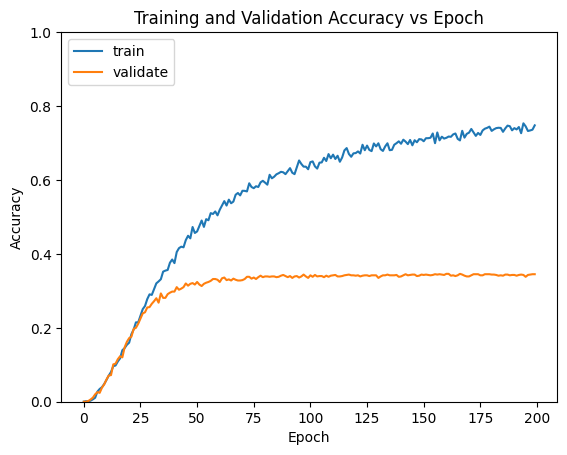

In [10]:

f = h5py.File('Multiple_Objects_Identification/network_identity_activations_4_Objects', 'r')

network1_layer_activations_test = np.asarray(f['test_layer_activations'])
network1_layer_activations_train = np.asarray(f['train_layer_activations'])
network1_layer_activations_validation = np.asarray(f['validation_layer_activations'])

f = h5py.File('Multiple_Objects_Identification/network_location_activations_4_Objects', 'r')

network2_layer_activations_test = np.asarray(f['test_layer_activations'])
network2_layer_activations_train = np.asarray(f['train_layer_activations'])
network2_layer_activations_validation = np.asarray(f['validation_layer_activations'])

combined_activation_train = np.concatenate((network1_layer_activations_train, network2_layer_activations_train),axis=1)
combined_activation_test = np.concatenate((network1_layer_activations_test, network2_layer_activations_test),axis=1)
combined_activation_validation = np.concatenate((network1_layer_activations_validation, network2_layer_activations_validation),axis=1)


four_Objects_accuracy = []

for i in range(1):

#Create and train model architecture
  def CNN_network_separate_identity_location():
      model = Sequential()

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((9*3*3)*(81*9*9),activation='softmax'))

      return model

  CNN_network_separate_identity_location = CNN_network_separate_identity_location()
  CNN_network_separate_identity_location.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_separate_identity_location.fit(combined_activation_train,identity_and_space_labels_train,validation_data=(combined_activation_validation,identity_and_space_labels_validate),epochs=200,batch_size=256,shuffle=True)

  scores = CNN_network_separate_identity_location.evaluate(combined_activation_test,identity_and_space_labels_test)
  four_Objects_accuracy.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()



# One pathway network

In [ ]:
four_Objects_accuracy_combined = []

for i in range(1):

  def CNN_network_identity_and_location():
      model = Sequential()

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None,input_shape=(140,140,1)))

      model.add(Conv2D(512,(10,10),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(512,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Conv2D(256,(3,3),activation='relu'))

      model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))

      model.add(Flatten())

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(200,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal',input_dim=200))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense(100,activation='relu',kernel_initializer='normal'))

      model.add(Dropout(0.30))

      model.add(Dense((9*3*3)*(81*9*9),activation='softmax'))

      return model

  CNN_network_identity_and_location = CNN_network_identity_and_location()
  CNN_network_identity_and_location.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history = CNN_network_identity_and_location.fit(data_train_images,identity_and_space_labels_train,validation_data=(data_validation_images,identity_and_space_labels_validate),epochs=1000,batch_size=256,shuffle=True)

  scores = CNN_network_identity_and_location.evaluate(data_test_images,identity_and_space_labels_test)
  four_Objects_accuracy_combined.append(scores[1])
  print("Accuracy:%.2f%%" %(scores[1]*100))

#Plot accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.legend(['train','validate'],loc='upper left')
plt.show()
